In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
import requests
import time
#Player Data:
#https://appac.github.io/mlb-data-api-docs/#player-data-player-search-get
#Homerun Data:
#https://www.statcrunch.com/5.0/shareddata.php?keywords=BASEBALL

In [11]:
#uses the APPAC API to retrieve Player information
def get_hit_hand(last_name):
    time.sleep(0.1)
    bat_hand = ''
    name = last_name
    url = f"http://lookup-service-prod.mlb.com/json/named.search_player_all.bam?sport_code='mlb'&active_sw='Y'\
&name_part='{name}%25'"
    try:
        r = requests.get(url)
        json_data = r.json()
        bat_hand = json_data['search_player_all']['queryResults']['row'].get('bats')
    except:
        pass
    print(name)
    return bat_hand

In [3]:
#import the homerun data
df = pd.read_csv('home_runs.csv', parse_dates=['Date'])

In [4]:
df.head()

,Date,Hitter,Hitter Team,Pitcher,Pitching Team,Inninng,Ballpark,Type,Distance,Speed Off Bat,Elev Angle,Hor Angle,Apex,Number of Parks
0,2016-04-03,"Tulowitzki, Troy",TOR,"Webb, Ryan",TB,8,Tropicana Fi...,PL,400,105.2,25.5,108.3,76,30
1,2016-04-03,"Dickerson, Corey",TB,"Stroman, Marcus",TOR,9,Tropicana Fi...,PL,385,104.8,24.3,69.1,66,28
2,2016-04-04,"Story, Trevor",COL,"Greinke, Zack",ARI,4,Chase Field,ND,428,107.1,29.7,107.1,107,30
3,2016-04-04,"Posey, Buster",SF,"Pena, Ariel",MIL,8,Miller Park,PL,424,105.9,23.4,93.4,79,26
4,2016-04-04,"Seager, Kyle",SEA,"Hamels, Cole",TEX,2,Globe Life P...,PL,422,103.6,30.3,83.3,114,28


In [5]:
#create a 'last name' column to use for look-up
df['last_name'] = df.Hitter.apply(lambda x: x.split(',')[0].lower())

In [6]:
df.head()

,Date,Hitter,Hitter Team,Pitcher,Pitching Team,Inninng,Ballpark,Type,Distance,Speed Off Bat,Elev Angle,Hor Angle,Apex,Number of Parks,last_name
0,2016-04-03,"Tulowitzki, Troy",TOR,"Webb, Ryan",TB,8,Tropicana Fi...,PL,400,105.2,25.5,108.3,76,30,tulowitzki
1,2016-04-03,"Dickerson, Corey",TB,"Stroman, Marcus",TOR,9,Tropicana Fi...,PL,385,104.8,24.3,69.1,66,28,dickerson
2,2016-04-04,"Story, Trevor",COL,"Greinke, Zack",ARI,4,Chase Field,ND,428,107.1,29.7,107.1,107,30,story
3,2016-04-04,"Posey, Buster",SF,"Pena, Ariel",MIL,8,Miller Park,PL,424,105.9,23.4,93.4,79,26,posey
4,2016-04-04,"Seager, Kyle",SEA,"Hamels, Cole",TEX,2,Globe Life P...,PL,422,103.6,30.3,83.3,114,28,seager


In [12]:
#'look up a player's batting side
df['bat'] = df.last_name.apply(lambda x: get_hit_hand(x))

tulowitzki
dickerson
story
posey
seager
murphy
saunders
gonzalez
freeman
gennett
panik
harper
thole
donaldson
cano
garcia
arenado
montero
duffy
villar
galvis
span
souza jr.
lamb
story
dickerson
goldschmidt
story
cano
cruz
lemahieu
szczur
smith
segura
gose
stanton
rizzo
martinez
sardinas
betts
ortiz
frazier
correa
walker
fowler
gregorius
hundley
rollins
forsythe
kinsler
crawford
gyorko
correa
souza jr.
fielder
santana
story
duffy
castro
cano
davis
napoli
ortiz
lemahieu
cano
springer
souza jr.
ahmed
hazelbaker
martinez
franco
puig
saltalamacchia
suarez
carter
correa
donaldson
martin
ramirez
canha
holt
raburn
plouffe
beltran
teixeira
maeda
pederson
pence
howard
escobar
castro
white
bruce
bruce
mauer
rickard
ruiz
tucker
hunter
segura
harper
abreu
segura
rizzo
chirinos
machado
suarez
mccann
teixeira
kemp
park
longoria
upton jr.
schoop
gennett
braun
carter
piscotty
hazelbaker
story
lee
phillips
davis
marte
machado
brown
story
reimold
diaz
white
donaldson
odor
frazier
cabrera
garcia
crawford


headley
sano
shaw
park
jones
tulowitzki
heisey
harper
valencia
panik
encarnacion
davis
park
drew
kipnis
springer
ross
diaz
headley
russell
cruz
gomes
semien
nunez
rollins
bryant
iannetta
valencia
mccutchen
puig
cron
cabrera
correa
hazelbaker
upton jr.
bour
yelich
ortiz
walker
schoop
wilson
miller
kemp
seager
smoak
schoop
norris
lind
ramos
gonzalez
pujols
stubbs
frazier
trout
springer
wieters
lucroy
pence
goins
rizzo
myers
russell
tulowitzki
jones
gomes
centeno
herrera
calhoun
giavotella
carter
valbuena
lucroy
valencia
bogaerts
cespedes
valencia
gonzalez
valencia
morales
suarez
seager
longoria
martinez
raburn
eaton
desmond
beltre
guyer
polanco
machado
brown
wallace
kipnis
carpenter
kang
cabrera
coghlan
guyer
kinsler
correa
stanton
beltran
seager
zimmerman
mccann
ozuna
lamb
thompson
johnson
beckham
thompson
bour
jennings
semien
francoeur
goldschmidt
castellanos
suarez
suzuki
kinsler
gomes
pearce
martinez
sano
duvall
byrd
joyce
casali
valencia
crawford
abreu
beltre
castro
hosmer
lucroy
pe

encarnacion
granderson
duvall
conforto
thompson
freeman
walker
pillar
ramos
saunders
carter
hill
travis
pillar
martinez
cabrera
mccutchen
myers
gregorius
harper
seager
jones
desmond
upton
odor
castillo
correa
turner
tomas
gutierrez
perez
donaldson
zimmerman
cabrera
santana
goldschmidt
miller
turner
o'brien
smoak
davis
morales
beltran
belt
calhoun
o'brien
ortiz
cano
saunders
tomas
szczur
murphy
yelich
flaherty
gutierrez
saunders
escobar
saunders
norris
bryant
lind
bour
miller
morrison
longoria
flowers
uribe
naquin
cespedes
realmuto
francoeur
pederson
trout
bradley jr.
carrera
forsythe
napoli
herrera
flores
duffy
turner
park
panik
ahmed
suzuki
goldschmidt
duvall
mercer
cozart
rizzo
schoop
rodriguez
kendrick
bogaerts
ross
gonzalez
myers
braun
lamb
beltran
gattis
giavotella
abreu
upton
escobar
schoop
moreland
mccann
moya
ozuna
mccann
espinosa
wieters
belt
contreras
gattis
perez
piscotty
harrison
travis
hernandez
dozier
gennett
mazara
markakis
tulowitzki
uribe
valbuena
baez
cabrera
rizzo
ru

trumbo
machado
rupp
loney
kemp
votto
gyorko
saunders
murphy
morneau
betts
barnhart
kendrick
alvarez
story
healy
stanton
cruz
gonzalez
story
gattis
nieuwenhuis
mazara
williamson
schimpf
cruz
lucroy
seager
choi
garcia
saunders
upton
ramirez
beltre
saunders
trumbo
bruce
sano
adams
smoak
nieuwenhuis
smolinski
gattis
correa
story
ramos
joyce
forsythe
encarnacion
schimpf
teixeira
gonzalez
blanco
altuve
schoop
herrera
morales
pham
collins
castellanos
pedroia
lemahieu
shaw
bandy
arenado
deshields
butler
valbuena
goldschmidt
frazier
reimold
romine
ramirez
tomas
tucker
tomas
gattis
kendrick
castillo
eaton
saltalamacchia
altuve
nieuwenhuis
dickerson
bruce
beltran
dickerson
bruce
gennett
valencia
villar
beltre
suarez
wilkins
frazier
belt
arenado
iglesias
pagan
bruce
maldonado
desmond
perez
springer
baez
beltre
dickerson
gallo
duvall
moreland
eaton
liriano
bradley jr.
semien
perez
jones
smoak
rendon
gattis
donaldson
polanco
gyorko
kemp
crisp
grandal
cain
duvall
votto
cabrera
garcia
ortiz
gonzalez
r

desmond
ortiz
navarro
lamb
piscotty
perez
mazara
hernandez
donaldson
werth
mccann
beltre
cano
gomez
nieuwenhuis
gyorko
escobar
odor
piscotty
moss
de aza
panik
mccutchen
moss
beltre
teixeira
martin
alonso
weeks
gyorko
bryant
machado
flores
upton
donaldson
schimpf
murphy
hundley
plouffe
cain
werth
smoak
bryant
reyes
frazier
gonzalez
arcia
gutierrez
pujols
gordon
gattis
cabrera
mahtook
sanchez
mercer
marisnick
cabrera
sardinas
pagan
hosmer
machado
barney
headley
maybin
correa
abreu
johnson
grichuk
garcia
kemp
gonzalez
davis
encarnacion
schebler
cespedes
moreland
perez
perez
wilson
seager
cabrera
cravy
walker
bogaerts
davis
cozart
perez
votto
schimpf
castro
schebler
blackmon
hicks
trumbo
duvall
perez
cowart
sanchez
kinsler
saladino
plouffe
crawford
blackmon
galvis
avila
betts
ramirez
bregman
ramos
marte
donaldson
carpenter
dickerson
donaldson
trumbo
ortiz
tulowitzki
villar
phillips
freeman
marte
tomas
turner
panik
pearce
donaldson
vogt
davis
dahl
schebler
harper
span
nunez
jaso
beckham
can

loney
jaso
cabrera
utley
kim
bruce
seager
odor
gattis
cano
rizzo
gyorko
vargas
mahtook
bogaerts
brito
severino
difo
pinder
molina
zunino
swanson
sanchez
schimpf
arenado
snyder
yelich
carter
marte
goldschmidt
cabrera
belt
cabrera
upton
votto
anderson
drew
cano
kemp
rendon
cano
gyorko
cruz
jones
aoki
trumbo
odor
healy
owings
narvaez
holliday
zobrist
kinsler
beltran
zobrist
schoop
ortiz
moss
lindor
bautista
bruce
carter
davis
upton
chirinos
freeman
cano
dickerson
loney
haniger
cruz
buxton
kang
turner
austin
howard
tomas
polanco
markakis
pagan
gyorko
ruf
zobrist
suarez
machado
contreras
susac
cuthbert
gomes
santana
marte
drury
carpenter
sano
espinosa
telis
buxton
jaso
montero
blackmon
ramirez
hood
lucroy
wieters
wieters
vogt
travis
mccann


In [14]:
df.bat.describe()

count     5604
unique       4
top           
freq      2973
Name: bat, dtype: object

In [ ]:
'''df_copy = df.copy()
df_copy['buckets'] = df_copy.cut('Hor Angle', bins=9, labels=[LFLine, LLF, LF, LCF, CF, RCF, RF, RRF, RFLine])'''

Text(0, 0.5, 'Count of Home Runs')

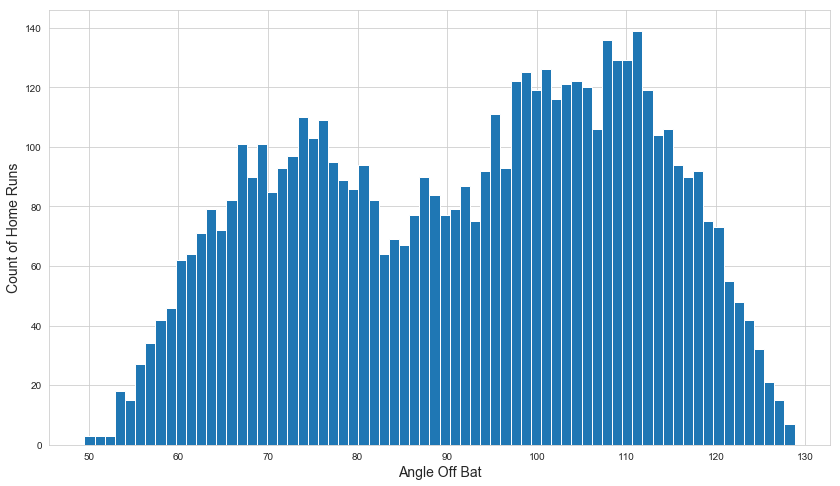

In [21]:
fig, ax = plt.subplots(figsize = (14,8))
df['Hor Angle'].hist(bins=70)
plt.xlabel('Angle Off Bat', fontsize=14)
plt.ylabel('Count of Home Runs', fontsize=14)